In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
data = pd.read_excel("/content/Investment.xlsx")

In [4]:
df = pd.DataFrame(data=data,columns=['Year','STOCK','Bank','Property','Dollar','Coin'],dtype=np.float64)
dd = pd.DataFrame(data=data,columns=['STOCK','Bank','Property','Dollar','Coin'],dtype=np.float64)
print(df)

    Year  STOCK  Bank  Property  Dollar   Coin
0   71.0   -8.0  10.0       0.0     5.0    0.0
1   72.0   -7.0  12.0       4.0    21.0   33.0
2   73.0   72.0  12.0      19.0    46.0   84.0
3   74.0  123.0  14.0      34.0    53.0   46.0
4   75.0   25.0  14.0      46.0    10.0   -7.0
5   76.0  -15.0  14.0      14.0     8.0   -6.0
6   77.0   -7.0  14.0      14.0    35.0   16.0
7   78.0   44.0  14.0      15.0    33.0   30.0
8   79.0   35.0  14.0      12.0    -6.0    3.0
9   80.0   26.0  13.0      29.0    -3.0    1.0
10  81.0   35.0  13.0      48.0     1.0   15.0
11  82.0  125.0  13.0      37.0     2.0   23.0
12  83.0    6.0  13.0      14.0     7.0   21.0
13  84.0  -22.0  18.0      17.0     2.0   18.0
14  85.0    4.0  18.0      19.0     3.0   37.0
15  86.0    2.0  18.0      58.0     1.0   14.0
16  87.0  -21.0  17.0       7.0     3.0   21.0
17  88.0   57.0  15.0      18.0     3.0    6.0
18  89.0   86.0  14.0      -1.0     5.0   42.0
19  90.0   11.0  17.0      10.0    15.0   68.0
20  91.0    5

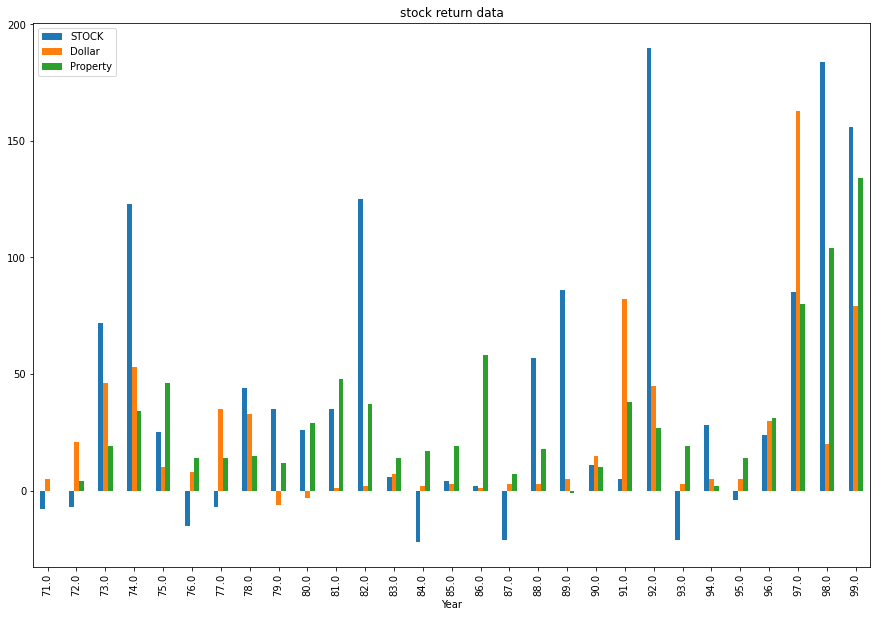

In [ ]:
df.plot(x='Year',y=['STOCK','Dollar','Property'],kind='bar',title='stock return data',figsize=(15,10))

In [ ]:
dd.mean(axis=0)

STOCK       42.000000
Bank        15.896552
Property    29.758621
Dollar      23.310345
Coin        35.793103
dtype: float64

In [ ]:
dd.std()

STOCK       61.517129
Bank         3.436618
Property    30.933864
Dollar      35.561921
Coin        54.106627
dtype: float64

In [ ]:
under_df = dd[dd < dd.mean()]
under_df.std()

STOCK       19.144113
Bank         1.280510
Property     8.233081
Dollar       6.747319
Coin        13.962876
dtype: float64

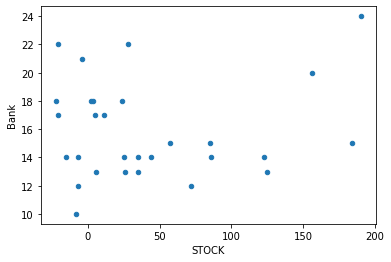

In [ ]:
df.plot(x='STOCK',y='Bank',kind='scatter')

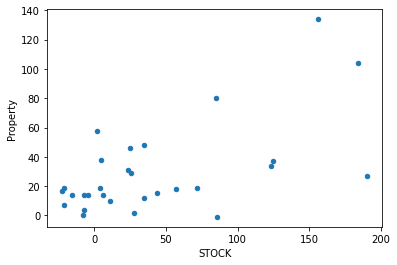

In [ ]:
df.plot(x='STOCK',y='Property',kind='scatter')

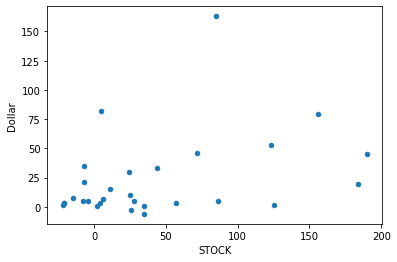

In [ ]:
df.plot(x='STOCK',y='Dollar',kind='scatter')

In [ ]:
dd.corr()

,STOCK,Bank,Property,Dollar,Coin
STOCK,1.000000,0.102542,0.592441,0.373800,0.395150
Bank,0.102542,1.000000,0.133129,0.061348,0.075941
Property,0.592441,0.133129,1.000000,0.510818,0.664035
Dollar,0.373800,0.061348,0.510818,1.000000,0.778046
Coin,0.395150,0.075941,0.664035,0.778046,1.000000


In [ ]:
dd.cov()

,STOCK,Bank,Property,Dollar,Coin
STOCK,3784.357143,21.678571,1127.392857,817.750000,1315.250000
Bank,21.678571,11.810345,14.152709,7.497537,14.120690
Property,1127.392857,14.152709,956.903941,561.934729,1111.412562
Dollar,817.750000,7.497537,561.934729,1264.650246,1497.066502
Coin,1315.250000,14.120690,1111.412562,1497.066502,2927.527094


In [5]:
cov_matrix = dd.cov().to_numpy()
mean_matrix = dd.mean().to_numpy().reshape((1,5))

In [6]:
print(cov_matrix)
print(mean_matrix)

[[3784.35714286   21.67857143 1127.39285714  817.75       1315.25      ]
 [  21.67857143   11.81034483   14.15270936    7.49753695   14.12068966]
 [1127.39285714   14.15270936  956.90394089  561.93472906 1111.41256158]
 [ 817.75          7.49753695  561.93472906 1264.65024631 1497.06650246]
 [1315.25         14.12068966 1111.41256158 1497.06650246 2927.5270936 ]]
[[42.         15.89655172 29.75862069 23.31034483 35.79310345]]


In [7]:
def mean_variance(weight_matrix,mean_matrix,cov_matrix):
  mean = np.matmul(weight_matrix,mean_matrix.transpose()).sum()
  temp = np.matmul(weight_matrix.transpose(),weight_matrix)
  var  = np.multiply(temp,cov_matrix).sum()
  return mean,var

In [8]:
def sharp_ratio(weight_matrix,mean_matrix=mean_matrix,cov_matrix=cov_matrix):
  weight_matrix = weight_matrix.reshape((1,5))
  weight_matrix = weight_matrix/(weight_matrix.sum())
  m,v = mean_variance(weight_matrix,mean_matrix,cov_matrix)
  return -((m-16)/(math.sqrt(v)))

In [ ]:
!pip install geneticalgorithm

In [10]:
from geneticalgorithm import geneticalgorithm as ga
varbound = np.array([[0,1]]*5)
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':1500}
model=ga(function=sharp_ratio,dimension=5,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

 The best solution found:
 [5.63489898e-01 1.73432833e-03 9.91492400e-01 7.52122323e-05
 3.25123238e-01]

 Objective function:
 -0.4955922681485721


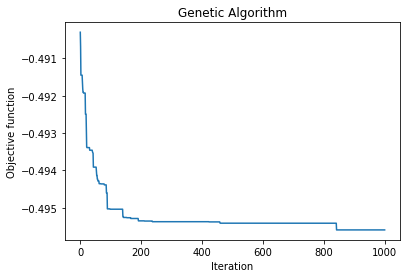

In [11]:
model.run()

In [12]:
ans = model.best_variable

In [13]:
ans_1 = ans.reshape((1,5))/ans.sum()
print(ans_1*100)

[[2.99423659e+01 9.21576299e-02 5.26852892e+01 3.99657950e-03
  1.72761907e+01]]


In [ ]:
mean_variance(ans_1,mean_matrix,cov_matrix)

(35.627068218433, 1581.093380002018)

In [ ]:
ans_2=np.array([0.4,0.12,0.45,0,0.008]).reshape(1,5)
mean_variance(ans_2,mean_matrix,cov_matrix)

(32.38531034482758, 1225.5455677931036)

In [ ]:
sharp_ratio(ans_1)

-0.39551390470101105